2025-06-29 07:50:26.921877: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751183427.202612     210 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751183427.279416     210 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading data...


2025-06-29 07:50:36.393780: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Preprocessing data...
Building model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.6012 - loss: 1.1359 - val_accuracy: 0.8278 - val_loss: 0.4670 - learning_rate: 0.0010
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.8158 - loss: 0.5149 - val_accuracy: 0.8553 - val_loss: 0.3892 - learning_rate: 0.0010
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.8430 - loss: 0.4368 - val_accuracy: 0.8700 - val_loss: 0.3494 - learning_rate: 0.0010
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8550 - loss: 0.4081 - val_accuracy: 0.8789 - val_loss: 0.3268 - learning_rate: 0.0010
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.8701 - loss: 0.3672 - val_accuracy: 0.8806 - val_loss: 0.3107 - learning_rate: 0.0010
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.8704 - loss: 0.3557 - val_accuracy: 0.8860 - val_loss: 0.2993 - learning_rate: 0.0010
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.8800 - loss: 0.3323

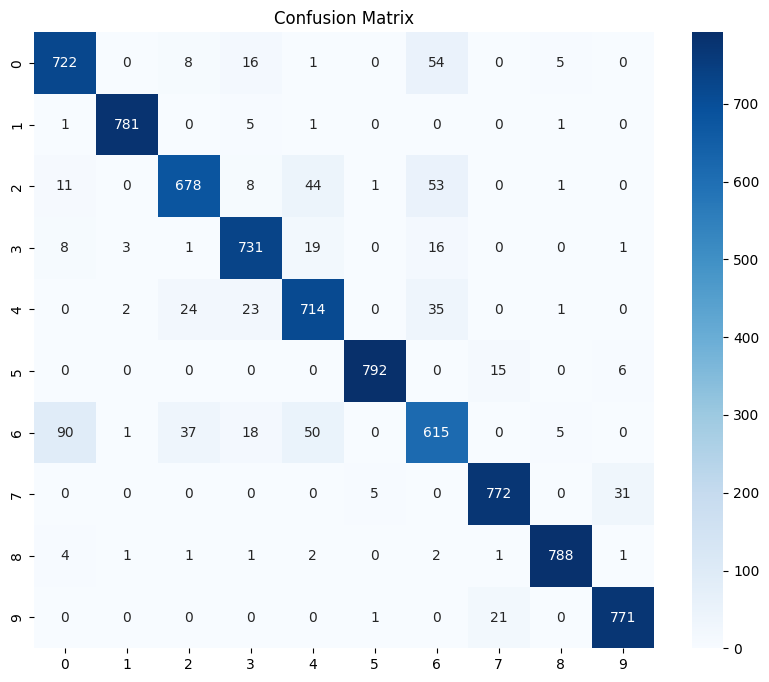

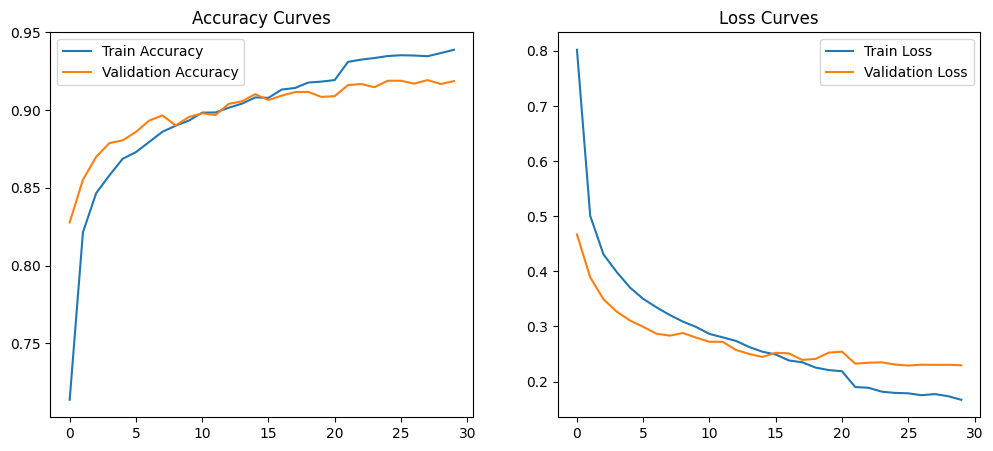

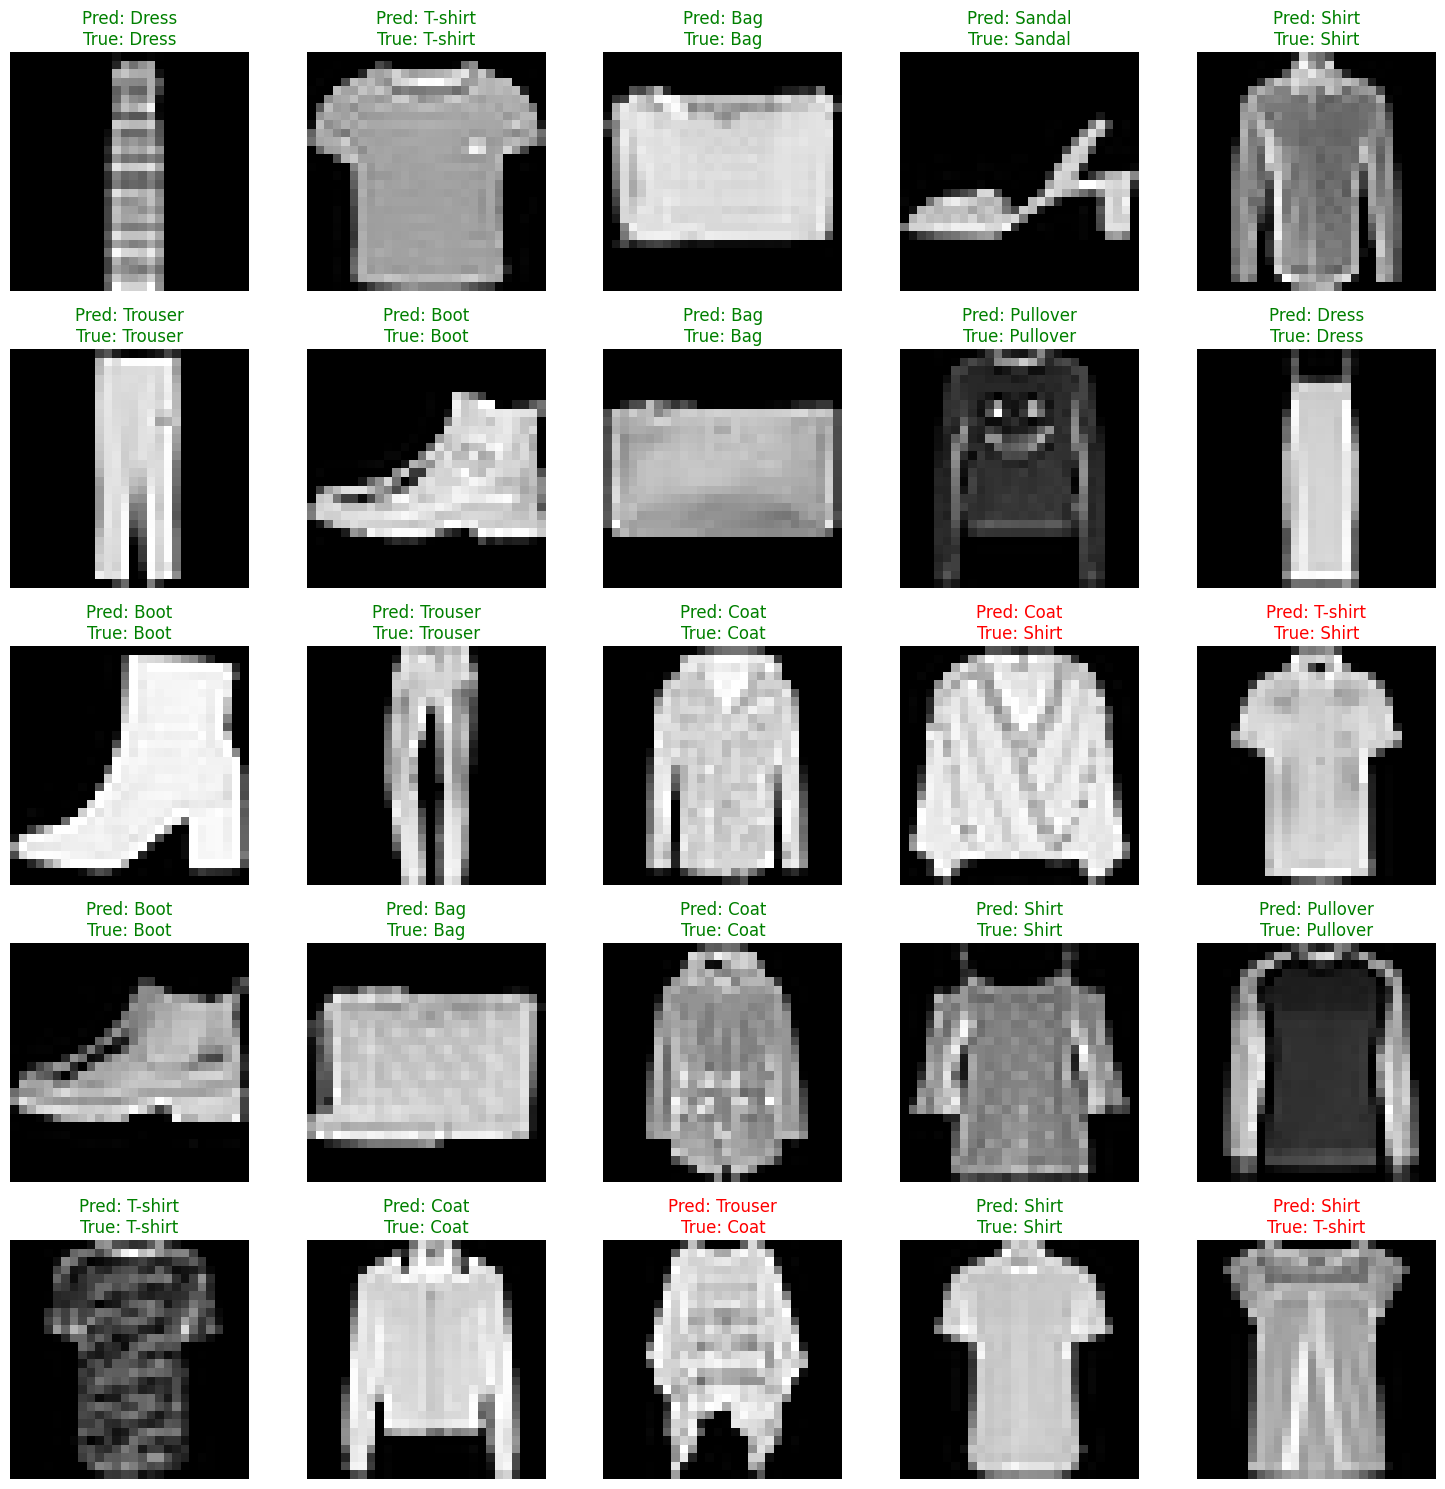

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Disable GPU to prevent CUDA errors
tf.config.set_visible_devices([], 'GPU')

# 1. Memory-efficient data loading
def load_data(train_path, test_path, sample_fraction=1.0):
    print("Loading data...")
    # Load in chunks to prevent memory overflow
    train_chunks = pd.read_csv(train_path, chunksize=5000)
    test_chunks = pd.read_csv(test_path, chunksize=5000)
    
    train_df = pd.concat([chunk.sample(frac=sample_fraction) for chunk in train_chunks])
    test_df = pd.concat([chunk.sample(frac=sample_fraction) for chunk in test_chunks])
    
    # Extract features and labels
    y_train = train_df['label'].values
    x_train = train_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1)
    
    y_test = test_df['label'].values
    x_test = test_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1)
    
    return (x_train, y_train), (x_test, y_test)

# 2. Simplified preprocessing
def preprocess_data(x_train, x_test):
    print("Preprocessing data...")
    # Normalize and resize
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    
    # Simple augmentation (only horizontal flip)
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        horizontal_flip=True,
        validation_split=0.2
    )
    
    return x_train, x_test, datagen

# 3. Lightweight custom CNN model
def build_lightweight_model(input_shape=(28, 28, 1), num_classes=10):
    print("Building model...")
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Main execution
def main():
    # File paths
    train_path = '/kaggle/input/fashionmnist/fashion-mnist_train.csv'
    test_path = '/kaggle/input/fashionmnist/fashion-mnist_test.csv'
    
    # Load data (using 80% to prevent memory issues)
    (x_train, y_train), (x_test, y_test) = load_data(train_path, test_path, 0.8)
    
    # Preprocess
    x_train, x_test, datagen = preprocess_data(x_train, x_test)
    
    # Build model
    model = build_lightweight_model()
    model.summary()
    
    # Callbacks
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3)
    ]
    
    # Train with generator
    print("Training model...")
    train_gen = datagen.flow(x_train, y_train, batch_size=128, subset='training')
    val_gen = datagen.flow(x_train, y_train, batch_size=128, subset='validation')
    
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=30,
        callbacks=callbacks,
        verbose=1
    )
    
    # Evaluation
    print("\nEvaluating on test set...")
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")
    
    # Classification report
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    # Confusion matrix
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_matrix(y_test, y_pred_classes), 
                annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Training history
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curves')
    plt.legend()
    plt.show()
    
    # Sample predictions
    class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']
    
    plt.figure(figsize=(15,15))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(x_test[i].squeeze(), cmap='gray')
        pred_label = class_names[y_pred_classes[i]]
        true_label = class_names[y_test[i]]
        color = 'green' if pred_label == true_label else 'red'
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()